In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression


In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

# READ THE DATA 

In [134]:
import pandas as pd 
df=pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# VOIR LES VALEURS NULL


In [135]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [136]:
df['age'].value_counts()


58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [137]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')


Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


# Data visualtsation 

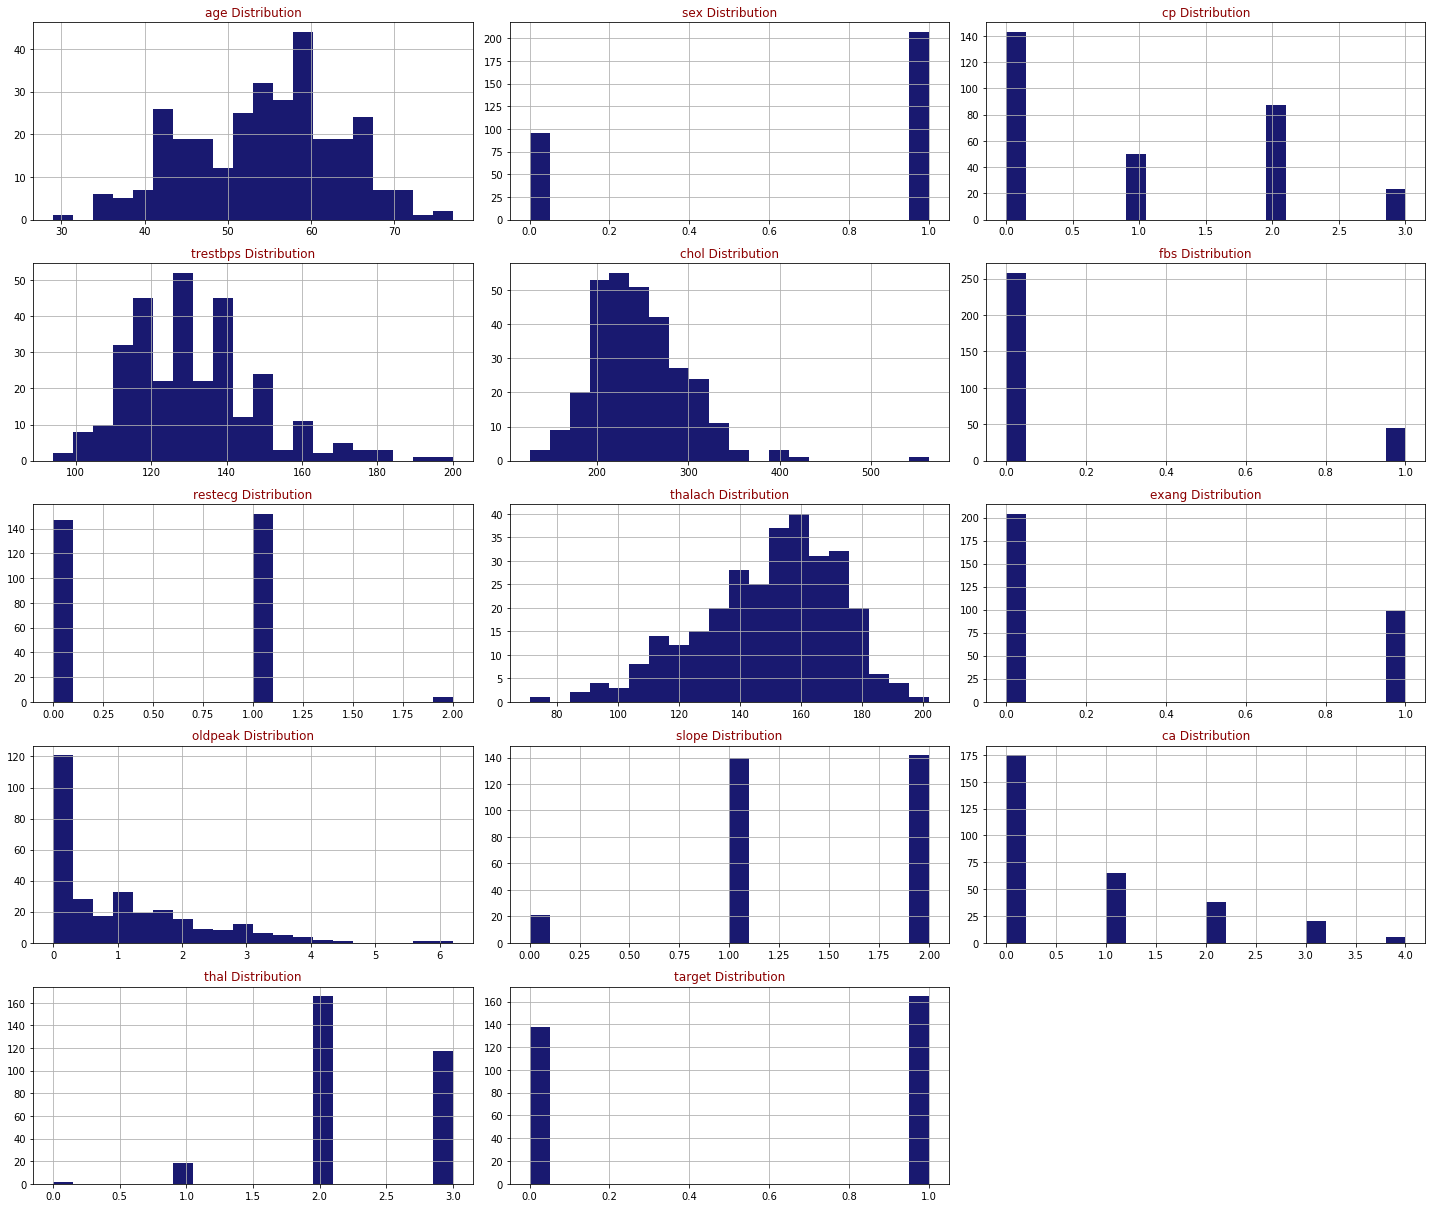

In [138]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [139]:
df.target.value_counts()
"165 with risk of heart attack"

'165 with risk of heart attack'

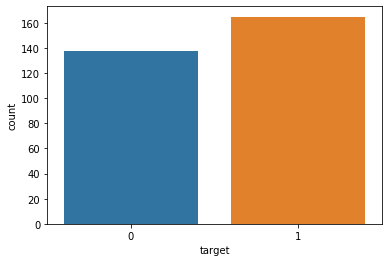

In [140]:
sn.countplot(x='target',data=df)


# Using logistic regression


In [142]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

C:\Users\asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df.target,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.4937
Time:                        11:05:03   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.000      -2.677      -0.839
cp             0.8599      0.185      4.638      0.000       0.496       1.223
trestbps      -0.0195      0.010     -1.884      0.060      -0.040       0.001
chol          -0.0046      0.004     -1.224      0.221      -0.012       0.003
fbs            0.0349      0.529      0.066      0.947      -1.003       1.073
restecg        0.4663      0.348      1.339      0.181      -0.216       1.149
thalach        0.0232      0.010      2.219      0.026       0.003       0.044
exang         -0.9800      0.410     -2.391      0.017      -1.783      -0.177
oldpeak       -0.5403      0.214     -2.526      0.012      -0.959      -0.121
slope          0.5793      0.350      1.656      0.098      -0.106       1.265
ca            -0.7733      0.191     -4.051      0.000      -1.147      -0.399
thal          -0.9004      0.290     -3.104      0.002      -1.469      -0.332
==============================================================================
"""

In [144]:
"Feature Selection: Backward elemination"


'Feature Selection: Backward elemination'

In [145]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,df.target,cols)

In [146]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.4651
Time:                        11:05:06   Log-Likelihood:                -111.71
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 3.209e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.3898      0.405     -3.431      0.001      -2.184      -0.596
cp             0.7861      0.174      4.509      0.000       0.444       1.128
thalach        0.0261      0.004      5.905      0.000       0.017       0.035
exang         -1.0130      0.376     -2.695      0.007      -1.750      -0.276
oldpeak       -0.7262      0.176     -4.130      0.000      -1.071      -0.382
ca            -0.7053      0.173     -4.087      0.000      -1.043      -0.367
thal          -0.8674      0.259     -3.351      0.001      -1.375      -0.360
==============================================================================
"""

In [147]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

         CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
sex          0.112623       0.551073    0.249126   0.001
cp           1.559575       3.088655    2.194764   0.000
thalach      1.017567       1.035326    1.026408   0.000
exang        0.173839       0.758508    0.363123   0.007
oldpeak      0.342750       0.682775    0.483757   0.000
ca           0.352232       0.692750    0.493973   0.000
thal         0.252918       0.697612    0.420046   0.001


In [148]:
#This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.


#The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644"

#Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH"

#For Total cholosterol level and glucose level there is no significant change"

#There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure">


In [149]:
#Splitting data to train and test split#

# train test split


In [158]:

new_features=df[['age','sex','cp','chol','oldpeak','target']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [160]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [161]:
sklearn.metrics.accuracy_score(y_test,y_pred)


0.8852459016393442

#Accuracy of the model is 0.88


# USE of KNN 


In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier(n_neighbors=5)

In [168]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [169]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5573770491803278


In [170]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6065573770491803


In [175]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5573770491803278


In [176]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [180]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [182]:
#prediction
y_pred = classifier.predict(x_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8360655737704918


# using Random forest 

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
clf=RandomForestClassifier(n_estimators=100)

In [185]:
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [186]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8524590163934426


# the best Accuracy is with the logistic regression 